# 自行车租赁

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
train = pd.read_csv('kaggle_bike_competition_train.csv',header= 0)
train.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


# 数据字段

* (1) datetime：日期，以年-月-日 小时的形式给出。 
* (2) season：季节。1 为春季, 2为夏季,3 为秋季,4 为冬季。
* (3) hodliday：是否为假期。1代表是，0代表不是。 
* (4) workingday：是否为工作日，1代表是，0代表不是。 
* (5) weather:天气： <br>
    1: 天气晴朗或者少云/部分有云。 <br>
    2: 有雾和云/风等。 <br>
    3: 小雪/小雨，闪电及多云。 <br>
    4: 大雨/冰雹/闪电和大雾/大雪。<br>   
* (6) temp - 摄氏温度。 
* (7) atemp - 人们感觉的温度。 
* (8) humidity - 湿度。 
* (9) windspeed - 风速。 
* (10) casual -随机预定自行车的人数 
* (11) registered - 登记预定自行车的人数。 
* (12) count - 总租车数，即casual+registered数目。 <br>
其中10~12不属于特征，12为我们需要预测的值。

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


# datetime  时间

In [4]:
train['month'] = pd.DatetimeIndex(train['datetime']).month

In [5]:
train['month'].value_counts()

7     912
6     912
5     912
12    912
8     912
11    911
10    911
4     909
9     909
3     901
2     901
1     884
Name: month, dtype: int64

In [6]:
train['day'] =pd.DatetimeIndex(train['datetime']).day
train['hour'] =pd.DatetimeIndex(train['datetime']).hour

In [7]:
train.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,1,4


In [8]:
train.season.value_counts()

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

In [9]:
train.weather.value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

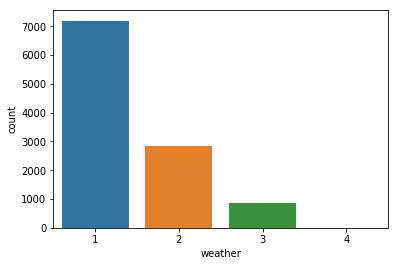

In [10]:
sns.countplot('weather',data =train)

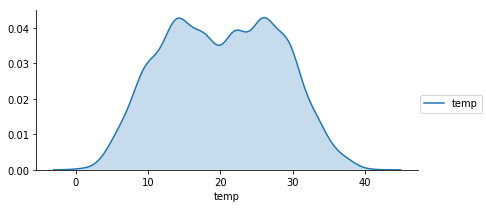

In [11]:
#sns.countplot('weather',data =train)
a = sns.FacetGrid(train,aspect=2)
a.map(sns.kdeplot,'temp',shade =True)
a.add_legend()

In [12]:
'''
ddd =train
fulldata =[train,ddd]
#print(type(fulldata))
for dataset in fulldata:
    #print(dateset,type(dateset),dateset[0])
    print('dataset[temp]',dataset['temp'])
    if dataset['temp']>10:
        print('hah')
    dataset.loc[dataset['temp']<10,'temp']=0
    dataset.loc[(dataset['temp']>=10)&(dataset['temp']<20),'temp']=1
    dataset.loc[(dataset['temp']>=20)&(dataset['temp']<30),'temp']=2
    dataset.loc[(dataset['temp']>=30)&(dataset['temp']<40),'temp']=3
    dataset.loc[dataset['temp']>=40,'temp']=4   
'''

"\nddd =train\nfulldata =[train,ddd]\n#print(type(fulldata))\nfor dataset in fulldata:\n    #print(dateset,type(dateset),dateset[0])\n    print('dataset[temp]',dataset['temp'])\n    if dataset['temp']>10:\n        print('hah')\n    dataset.loc[dataset['temp']<10,'temp']=0\n    dataset.loc[(dataset['temp']>=10)&(dataset['temp']<20),'temp']=1\n    dataset.loc[(dataset['temp']>=20)&(dataset['temp']<30),'temp']=2\n    dataset.loc[(dataset['temp']>=30)&(dataset['temp']<40),'temp']=3\n    dataset.loc[dataset['temp']>=40,'temp']=4   \n"

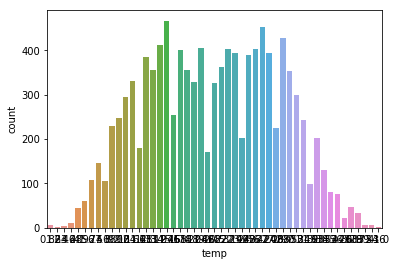

In [13]:
sns.countplot('temp',data=train)

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
month         10886 non-null int64
day           10886 non-null int64
hour          10886 non-null int64
dtypes: float64(3), int64(11), object(1)
memory usage: 1.2+ MB


In [15]:
train = train.drop(['registered','casual','datetime'],axis=1)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
count         10886 non-null int64
month         10886 non-null int64
day           10886 non-null int64
hour          10886 non-null int64
dtypes: float64(3), int64(9)
memory usage: 1020.6 KB


Text(0.5,1,'Count of Total weather')

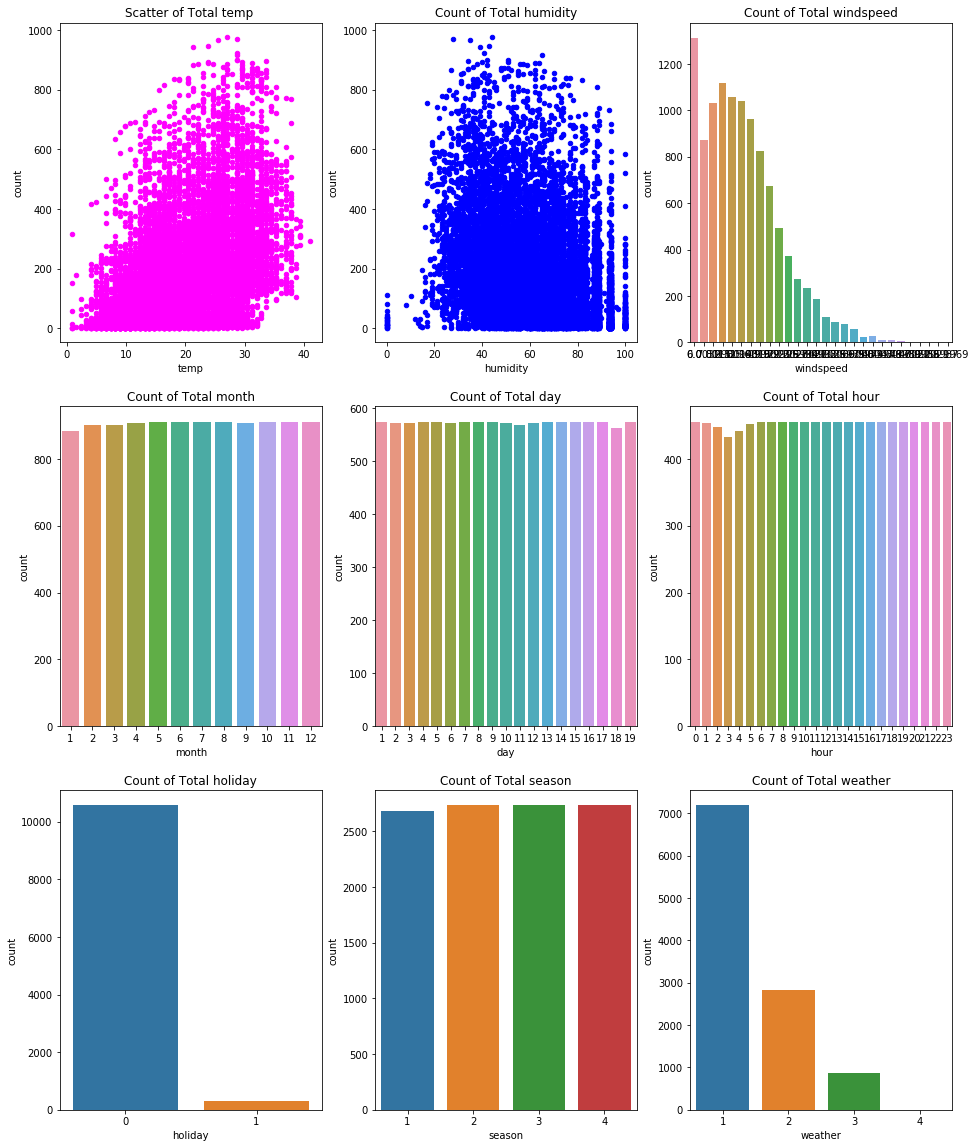

In [16]:
fig,axs =plt.subplots(3,3,figsize =(16,20))
train.plot(kind='scatter', x='temp', y='count', ax=axs[0, 0], color='magenta')
train.plot(kind='scatter',x='humidity',y='count',ax =axs[0,1],color='blue')
sns.countplot('windspeed', data=train,ax=axs[0,2])
sns.countplot('month', data=train,ax=axs[1,0])
sns.countplot('day', data=train,ax=axs[1,1])
sns.countplot('hour', data=train,ax=axs[1,2])
sns.countplot('holiday', data=train,ax=axs[2,0])
sns.countplot('season', data=train,ax=axs[2,1])
sns.countplot('weather', data=train,ax=axs[2,2])
axs[0,0].set_title('Scatter of Total temp ')
axs[0,1].set_title('Count of Total humidity')
axs[0,2].set_title('Count of Total windspeed')
axs[1,0].set_title('Count of Total month')
axs[1,1].set_title('Count of Total day')
axs[1,2].set_title('Count of Total hour')
axs[2,0].set_title('Count of Total holiday')
axs[2,1].set_title('Count of Total season')
axs[2,2].set_title('Count of Total weather')

In [17]:
Y_train =train['count']
X_train =train.drop(['count'],axis=1).values#train[['temp','humidity','windspeed','month','day','hour']]

print(Y_train.shape)
print(X_train.shape)

(10886,)
(10886, 11)


In [18]:
from sklearn import linear_model
from sklearn import cross_validation
from sklearn import svm
from sklearn.ensemble  import RandomForestRegressor
from sklearn.learning_curve import learning_curve
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import explained_variance_score

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [19]:
# 总得切分一下数据咯（训练集和测试集）
cv = cross_validation.ShuffleSplit(len(X_train), n_iter=3, test_size=0.2,
    random_state=0)

# 各种模型来一圈

print( "岭回归" )   
for xtrain, test in cv:    
    svc = linear_model.Ridge()
    svc.fit(X_train[xtrain], Y_train[xtrain])
    print("train score: {0:.3f}, test score: {1:.3f}\n".format(
        svc.score(X_train[xtrain], Y_train[xtrain]), svc.score(X_train[test], Y_train[test])))

print('支持向量回归/SVR(kernel=rb,C=10,gamma=0.001)')
for xtrain,test in cv:
    svc =svm.SVR(kernel='rbf',C=10,gamma =0.001)
    svc.fit(X_train[xtrain],Y_train[xtrain])
    train_score = svc.score(X_train[xtrain],Y_train[xtrain])
    test_score =svc.score(X_train[test],Y_train[test])
    print('train score:%.2f'%train_score,'test score:%.2f \n'%test_score)
    
print('随机森林/(n_estimators=100)')
for xtrain,test in cv:
    svc =RandomForestRegressor(n_estimators=100)
    svc.fit(X_train[xtrain],Y_train[xtrain])
    train_score = svc.score(X_train[xtrain],Y_train[xtrain])
    test_score =svc.score(X_train[test],Y_train[test])
    print('train score:%.2f'%train_score,'test score:%.2f \n'%test_score)

岭回归
train score: 0.339, test score: 0.332

train score: 0.330, test score: 0.369

train score: 0.342, test score: 0.320

支持向量回归/SVR(kernel=rb,C=10,gamma=0.001)
train score:0.41 test score:0.40 

train score:0.40 test score:0.44 

train score:0.42 test score:0.38 

随机森林/(n_estimators=100)
train score:0.98 test score:0.86 

train score:0.98 test score:0.88 

train score:0.98 test score:0.87 



In [20]:
X = X_train
Y = Y_train

Xtrain,Xtest,Ytrain,Ytest = cross_validation.train_test_split(
                X,Y,test_size = 0.2 ,random_state =0)

tuned_parameters = [{'n_estimators':[10,100,200,300,500]}]

scores = ['r2']#R2 决定系数（拟合优度） 

for score in scores:
    print(score)
    clf = GridSearchCV(RandomForestRegressor(),tuned_parameters,cv=5 ,scoring=score)
    clf.fit(Xtrain,Ytrain)
    
    print(clf.best_estimator_)
    
    for params,mean_score,scores in clf.grid_scores_:
        print("%0.3f (+/-%0.03f) for %r"%(mean_score,scores.std()/2,params))

r2
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
0.849 (+/-0.006) for {'n_estimators': 10}
0.861 (+/-0.007) for {'n_estimators': 100}
0.862 (+/-0.006) for {'n_estimators': 200}
0.862 (+/-0.006) for {'n_estimators': 300}
0.862 (+/-0.006) for {'n_estimators': 500}


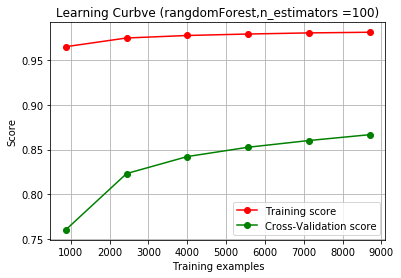

In [21]:
def plot_learning_curve(estimator ,title , X,Y,ylim= None ,cv =  None,
                       n_jobs= 1 ,train_sizes = np.linspace(.1,1.0 ,6)):
    plt.figure()
    plt.title(title)
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    train_sizes, train_scores, test_scores = learning_curve( 
        estimator,X , Y, cv =cv ,n_jobs = n_jobs ,train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores, axis =1)
    train_scores_std = np.std(train_scores, axis =1)
    test_scores_mean =np.mean(test_scores ,axis =1)
    test_scores_std =np.std(test_scores, axis =1)
    plt.grid()
    '''
    plt.fill_between(train_sizes ,train_scores_mean -train_scores_std,train_scores_mean +train_scores_std ,
               alpha =0.1 ,color ='r')
    plt.fill_between(train_sizes ,test_scores_mean -test_scores_std ,test_scores_mean+test_scores_std,
                    alpha =0.1 ,color ='r')
    '''
    plt.plot(train_sizes ,train_scores_mean ,'o-',color ='r',label ='Training score')
    plt.plot(train_sizes, test_scores_mean,'o-',color ='g',label ='Cross-Validation score')
    plt.legend(loc ='best')
    return plt
             
title = "Learning Curbve (rangdomForest,n_estimators =100)"
cv =cross_validation.ShuffleSplit(train.shape[0], n_iter =10 ,test_size =0.2 , random_state =0)
estimator = RandomForestRegressor(n_estimators =100)
        
plot_learning_curve(estimator,title ,X ,Y ,(0.0,1.01),cv =cv ,n_jobs =4 )

plt.show()